In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df = pd.read_csv(r"C:\Users\NAMAN\Downloads\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
df.shape

(200, 4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
df.describe().round(1)

,TV,Radio,Newspaper,Sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,15.1
std,85.9,14.8,21.8,5.3
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,11.0
50%,149.8,22.9,25.8,16.0
75%,218.8,36.5,45.1,19.0
max,296.4,49.6,114.0,27.0


In [19]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

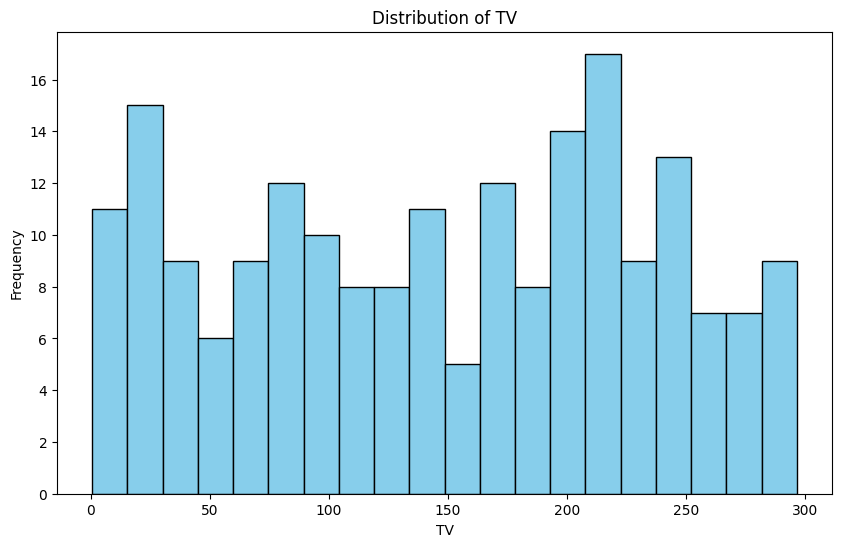

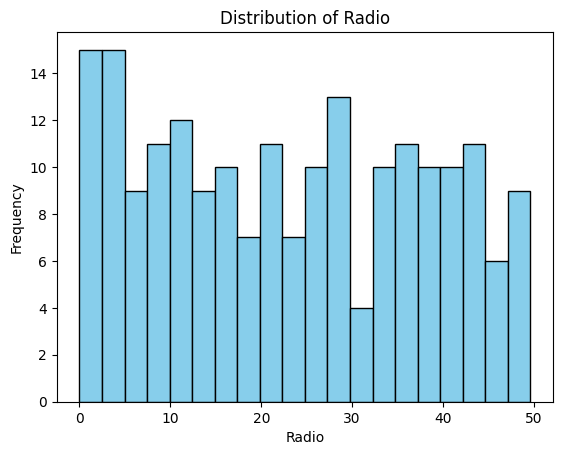

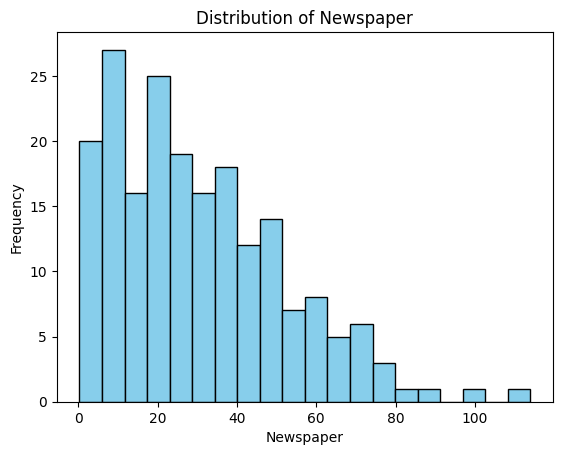

In [40]:
plt.figure(figsize=(10, 6))
for col in df.columns:
    if col != 'Sales':
        df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


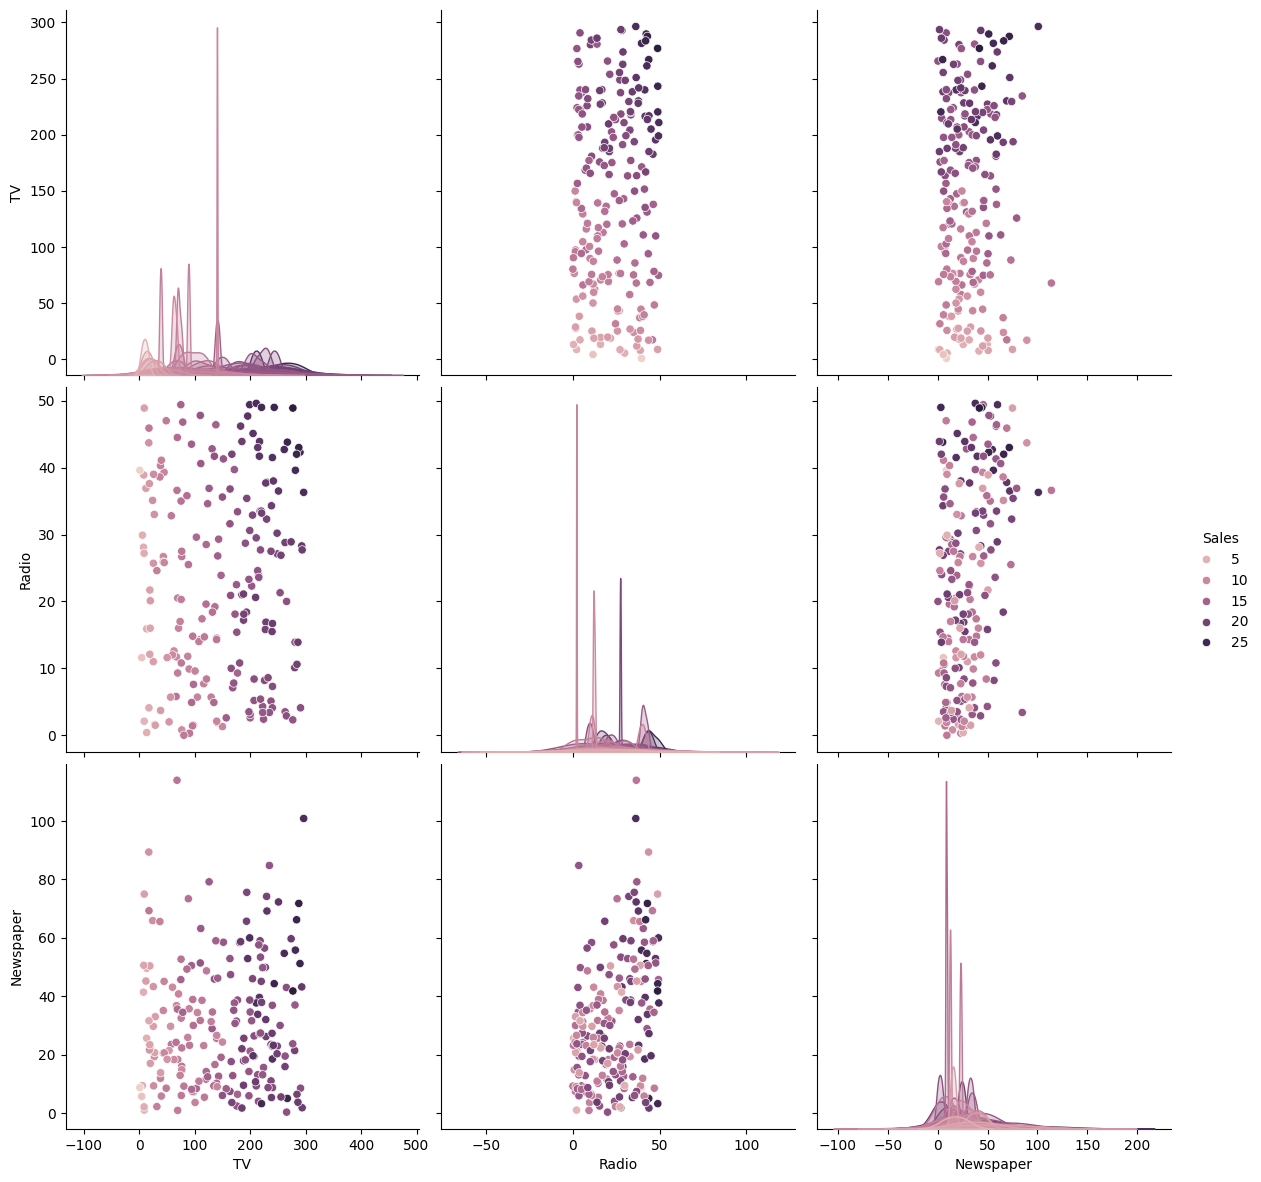

In [45]:
sns.pairplot(df,hue='Sales', height=4, aspect=1, kind='scatter')

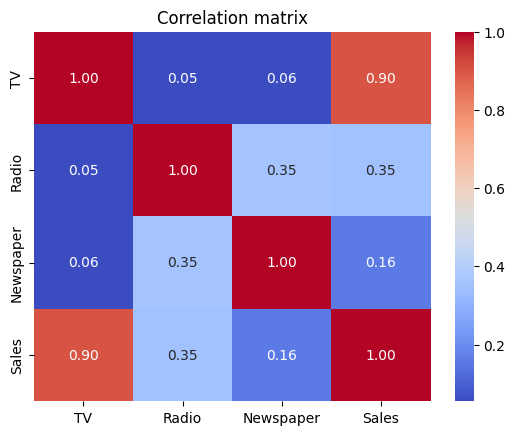

In [48]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [50]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor()
}

In [57]:
for name ,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'Name of the model : {name}')
    print('mean_squared_error : ',mean_squared_error(y_test,y_pred))
    print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred))
    print('r2_score : ',r2_score(y_test,y_pred))
    print('-' * 50)

Name of the model : LinearRegression
mean_squared_error :  2.9077569102710923
mean_absolute_error :  1.2748262109549349
r2_score :  0.9059011844150826
--------------------------------------------------
Name of the model : DecisionTreeRegressor
mean_squared_error :  3.3815
mean_absolute_error :  1.235
r2_score :  0.8905702385999203
--------------------------------------------------
Name of the model : RandomForestRegressor
mean_squared_error :  1.4301041500000025
mean_absolute_error :  0.9008000000000006
r2_score :  0.953719959807256
--------------------------------------------------


In [76]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [77]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [78]:
data = {'TV':[151.5],
        'Radio':[41.3],
        'Newspaper':[58.5]}

test = pd.DataFrame(data)

In [79]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)
test_rating = dt.predict(test)
print(test_rating)

[27.]
